# Example usage of one of the QuantumCircuit_vX classes

In [10]:
import sys
sys.path.append('src')

import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from quantum_circuit_v3 import QuantumCircuit_v3 as QuantumCircuit

n_qubits = 3

In [11]:
def plot_circle_notation(statevector, is_twos_complement: bool = False):

    # Function to convert an index to two's complement
    def twos_complement(value, bit_width):
        if value >= 2**(bit_width - 1):
            return value - 2**bit_width
        return value
    
    n_states = len(statevector)
    n_qubits = int(np.log2(n_states))

    # Calculate amplitude and phase
    prob = np.absolute(statevector)
    phase = np.angle(statevector)

    # Set the number of rows and columns (8 states per row)
    rows = int(np.ceil(n_states / 8.0))
    cols = min(n_states, 8)

    # Create a grid of subplots
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

    # Add padding between rows
    plt.subplots_adjust(hspace=0.5)  # Adjust this value to increase/decrease row spacing

    # If there's only one row, reshape the axs to handle uniformly
    if rows == 1:
        axs = np.reshape(axs, (1, cols))

    # Create a list of indices and sort by two's complement if needed
    indices = list(range(n_states))
    if is_twos_complement:
        indices.sort(key=lambda x: twos_complement(x, n_qubits))

    # Loop over all the states and plot them in their corresponding row and column
    for idx, i in enumerate(indices):
        row = idx // 8
        col = idx % 8

        # Create outer gray circle representing the max amplitude
        circleExt = matplotlib.patches.Circle((0.5, 0.5), 0.5, color='gray', alpha=0.1)
        axs[row, col].add_patch(circleExt)

        # Create inner blue circle representing the magnitude of the amplitude
        circleInt = matplotlib.patches.Circle((0.5, 0.5), prob[i] / 2, color='b', alpha=0.3)
        axs[row, col].add_patch(circleInt)

        # Set aspect ratio to equal for proper circle
        axs[row, col].set_aspect('equal')

        # Determine the label: either standard state or two's complement
        if is_twos_complement:
            state_number = "|" + str(twos_complement(i, n_qubits)) + ">"
        else:
            state_number = "|" + str(i) + ">"

        # Set the title with the appropriate state number
        title = f"{state_number}\n{100*prob[i]**2: .2f}%\nphase:{(180/np.pi)*phase[i] : .2f}"
        axs[row, col].set_title(title)

        # Plot the phase direction as a red line
        xl = [0.5, 0.5 + 0.5 * prob[i] * np.cos(phase[i] + np.pi / 2)]
        yl = [0.5, 0.5 + 0.5 * prob[i] * np.sin(phase[i] + np.pi / 2)]

        axs[row, col].plot(xl, yl, 'r')

        # Turn off the axes for a cleaner look
        axs[row, col].axis('off')

    # Turn off unused axes if n_states < 8 * rows
    # for j in range(self.n_states, rows * 8):
    #     row = j // 8
    #     col = j % 8
    #     axs[row, col].axis('off')

    # Show the plot
    plt.show()

Example usage of one of the quantum circuit simulators
States before QFT


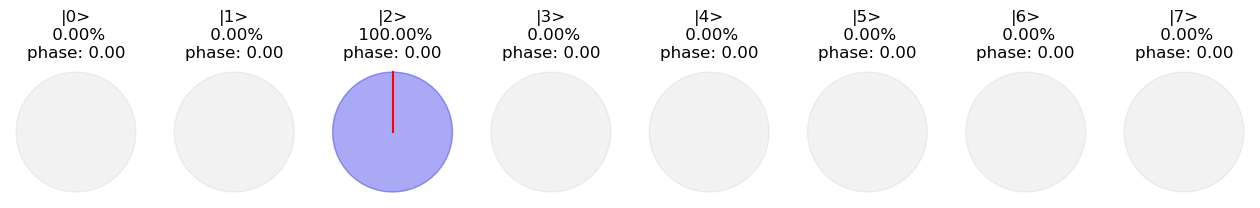

States after QFT


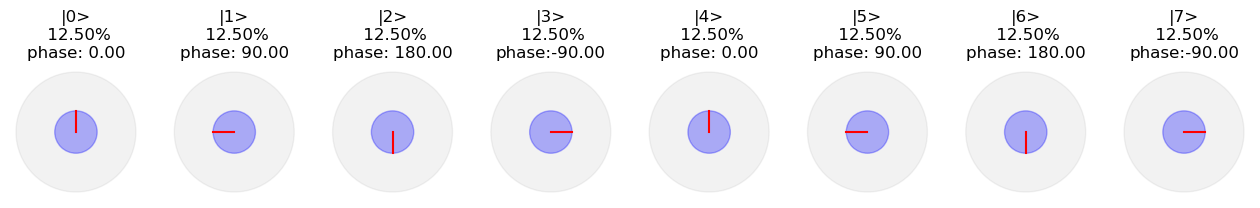

In [12]:
qc = QuantumCircuit(n_qubits)
print("Example usage of one of the quantum circuit simulators")

# initialize qubits
qc.x(1)

print("States before QFT")
plot_circle_notation(qc.get_full_statevector())

# do the QFT
qc.qft()
print("States after QFT")
plot_circle_notation(qc.get_full_statevector())